In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\churn.csv')

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df.shape

(7043, 21)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [53]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [54]:
df.loc[:, ['Partner', 'Dependents', 'PhoneService', \
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
            'TechSupport', 'StreamingTV', 'StreamingMovies',\
            'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,Yes,No,No,No,Yes,No,No,No,No,Yes,No
1,No,No,Yes,Yes,No,Yes,No,No,No,No,No
2,No,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes
3,No,No,No,Yes,No,Yes,Yes,No,No,No,No
4,No,No,Yes,No,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No
7040,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No
7041,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes


In [55]:
# Converting all the Yes to 1 and No to 0

var = ['Partner', 'Dependents', 'PhoneService', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
       'TechSupport', 'StreamingTV', 'StreamingMovies', 
       'PaperlessBilling', 'Churn']

for feature in var:
    df[feature] = df[feature].apply(lambda x : 1 if x=='Yes' else 0)
    
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [56]:
# Now again having a look at all those columns to see if everything went well

df.loc[:, ['Partner', 'Dependents', 'PhoneService', \
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
            'TechSupport', 'StreamingTV', 'StreamingMovies',\
            'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,1,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,1,1
3,0,0,0,1,0,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,1,1,1,1,0
7039,1,1,1,0,1,1,0,1,1,1,0
7040,1,1,0,1,0,0,0,0,0,1,0
7041,1,0,1,0,0,0,0,0,0,1,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [57]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

df.loc[:5, ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'TotalCharges']]

,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,No phone service,DSL,Month-to-month,Electronic check,29.85
1,No,DSL,One year,Mailed check,1889.5
2,No,DSL,Month-to-month,Mailed check,108.15
3,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,No,Fiber optic,Month-to-month,Electronic check,151.65
5,Yes,Fiber optic,Month-to-month,Electronic check,820.5


In [58]:
# You can also do this to separate Object columns

df.select_dtypes(include=['object'])

,customerID,gender,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,7590-VHVEG,Female,No phone service,DSL,Month-to-month,Electronic check,29.85
1,5575-GNVDE,Male,No,DSL,One year,Mailed check,1889.5
2,3668-QPYBK,Male,No,DSL,Month-to-month,Mailed check,108.15
3,7795-CFOCW,Male,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,Fiber optic,Month-to-month,Electronic check,151.65
...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,DSL,One year,Mailed check,1990.5
7039,2234-XADUH,Female,Yes,Fiber optic,One year,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,No phone service,DSL,Month-to-month,Electronic check,346.45
7041,8361-LTMKD,Male,Yes,Fiber optic,Month-to-month,Mailed check,306.6


In [59]:
# Lets just try to see what is happening with TotalCharges. Check the output.

df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.65       8
19.9        8
           ..
238.1       1
1882.55     1
538.2       1
132.25      1
3152.5      1
Name: TotalCharges, Length: 6531, dtype: int64

In [60]:
# Converting empty string in TotalCharges to NaN

df['TotalCharges'] = df['TotalCharges'].apply(lambda x : np.NaN if x==' ' else float(x))

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [62]:
# Dropping customerID

df = df.drop('customerID', axis=1)

df.shape

(7043, 20)

In [63]:
# Getting all the Object Dtypes

df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,gender,MultipleLines,InternetService,Contract,PaymentMethod
0,Female,No phone service,DSL,Month-to-month,Electronic check
1,Male,No,DSL,One year,Mailed check
2,Male,No,DSL,Month-to-month,Mailed check
3,Male,No phone service,DSL,One year,Bank transfer (automatic)
4,Female,No,Fiber optic,Month-to-month,Electronic check


In [64]:
df['MultipleLines'].value_counts

<bound method IndexOpsMixin.value_counts of 0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
7042                  No
Name: MultipleLines, Length: 7043, dtype: object>

In [65]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical), 
                      columns=encoder.get_feature_names(df_categorical.columns))

df_encoded.head()

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
df_categorical.columns

Index(['gender', 'MultipleLines', 'InternetService', 'Contract',
       'PaymentMethod'],
      dtype='object')

In [67]:
df = df.drop(df_categorical.columns, axis=1)

In [68]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0
1,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50,0
2,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,1
3,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,1


In [69]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [70]:
df.shape

(7043, 15)

In [71]:
df = pd.concat([df, df_encoded], axis=1)

df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
df.shape

(7043, 25)

In [74]:
df.isnull().sum()

SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMeth

In [73]:
df = df[~np.isnan(df['TotalCharges'])]

In [75]:
df['Churn'].value_counts()


0    5163
1    1869
Name: Churn, dtype: int64

<b> Step 1 : UnderSampling

In [76]:
df = df.sample(frac=1)

# amount of nonchurn classes 1869 rows.
churn_df = df.loc[df['Churn'] == 1]
non_churn_df = df.loc[df['Churn'] == 0][:1869]

normal_distributed_df = pd.concat([churn_df, non_churn_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2438,0,0,0,8,1,1,0,0,1,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6703,0,0,0,2,0,0,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5697,0,1,0,70,1,0,1,1,1,1,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3473,0,1,0,42,1,0,0,1,1,1,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4395,0,1,1,69,1,0,1,1,0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
new_df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [77]:
new_df.shape

(3738, 25)

In [78]:
y = new_df['Churn']
X = new_df.drop('Churn',axis = 1)

In [79]:
y.head()

2438    1
6703    1
5697    1
3473    1
4395    1
Name: Churn, dtype: int64

<b> Data Preprocessing using Standardization

In [80]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)


(3738, 24)


<b> Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(standardized_data,y,train_size = 0.80,random_state = 0)

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

<b> Prediction

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7767379679144385

<b> HyperParameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report


In [44]:
tuned_parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'C':[1,0.1,0.01,10,100],'penalty':['l1','l2','elasticnet']}]
evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))


Best parameters set found on train set:
{'C': 10, 'penalty': 'l2', 'solver': 'saga'}
LogisticRegression(C=10, solver='saga')

0.7780748663101604
Best parameters set found on train set:
{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=0.1, solver='newton-cg')

0.7692307692307693
Best parameters set found on train set:
{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

0.8200514138817481


In [81]:
con_metric = metrics.confusion_matrix(y_test,y_pred)
con_metric

array([[267,  92],
       [ 75, 314]], dtype=int64)

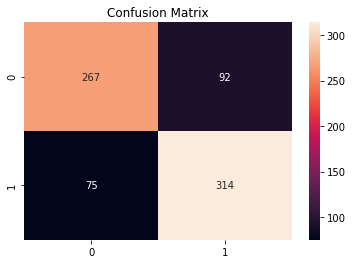

In [82]:
sns.heatmap(con_metric,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

<b> Logistic Regression

In [85]:
tuned_parameters = [{'solver':['newton-cg','lbfgs','liblinear','sag','saga'], 'C':[1,0.1,0.01,10,100],'penalty':['l1','l2','elasticnet']}]
evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)
    print('for {}'.format(i))
    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))


for accuracy
Best parameters set found on train set:
{'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
LogisticRegression(C=10)

0.7780748663101604
for precision
Best parameters set found on train set:
{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}
LogisticRegression(C=0.1, solver='newton-cg')

0.7692307692307693
for recall
Best parameters set found on train set:
{'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
LogisticRegression(C=10, solver='newton-cg')

0.8097686375321337


<b> K-Nearest Neighbor

In [48]:
from sklearn.neighbors import KNeighborsClassifier


In [51]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]
evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)
    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))


for accuracy
Best parameters set found on train set:
{'n_neighbors': 5, 'p': 1}
KNeighborsClassifier(p=1)

0.7219251336898396
for precision
Best parameters set found on train set:
{'n_neighbors': 4, 'p': 1}
KNeighborsClassifier(n_neighbors=4, p=1)

0.7307692307692307
for recall
Best parameters set found on train set:
{'n_neighbors': 5, 'p': 1}
KNeighborsClassifier(p=1)

0.7917737789203085


<B> Support Vector Machine

In [87]:
from sklearn.svm import SVC

In [90]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf = RandomizedSearchCV(SVC(), tuned_parameters, scoring='accuracy')
clf.fit(X_train, y_train)
print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'kernel': 'linear', 'C': 100}
SVC(C=100, kernel='linear')

0.7513368983957219


<b> Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier


In [54]:
tuned_parameters = [{'n_estimators':[10, 100, 1000],'max_depth':[2,3]}]
evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)
    print('for {}'.format(i))
    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

for accuracy
Best parameters set found on train set:
{'n_estimators': 1000, 'max_depth': 2}
RandomForestClassifier(max_depth=2, n_estimators=1000)

0.7459893048128342
for precision
Best parameters set found on train set:
{'n_estimators': 10, 'max_depth': 3}
RandomForestClassifier(max_depth=3, n_estimators=10)

0.740139211136891
for recall
Best parameters set found on train set:
{'n_estimators': 100, 'max_depth': 2}
RandomForestClassifier(max_depth=2)

0.8277634961439588


In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
tuned_parameters = [{'max_depth':[2,3,4,5,6]}]
evaluation_metrics = ['accuracy','precision','recall']
for i in evaluation_metrics:
    clf = RandomizedSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='{}'.format(i))
    clf.fit(X_train, y_train)
    print('for {}'.format(i))
    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

for accuracy
Best parameters set found on train set:
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4)

0.7393048128342246
for precision
Best parameters set found on train set:
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4)

0.7117903930131004
for recall
Best parameters set found on train set:
{'max_depth': 3}
DecisionTreeClassifier(max_depth=3)

0.8766066838046273
